<a href="https://colab.research.google.com/github/ebj22/data_projects/blob/main/spoti_5K_songs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# CLUSTERING 5K SONGS USING KMeans ALGORITHM

In [1]:
import pandas as pd

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import seaborn as sns
import plotly.graph_objects as go

In [ ]:
# ID of the Google Sheet for the songs
sheet_id = "1b4rleGIN2812uIqLdcYPslQeRjbw3XoWzpMUntuQV0g"
# URL to download the Google Sheet as a CSV
url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/export?format=csv"
# Create a Pandas DataFrame from the CSV data
df_audio_features = pd.read_csv(url,
                       index_col=["name", 'artist'])

In [ ]:
df_audio_features

,,Unnamed: 0,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature,id,html
name,artist,,,,,,,,,,,,,,,,,
Se Eu Quiser Falar Com Deus,Gilberto Gil,0,0.6580,0.25900,11,-13.141,0,0.0705,0.694,0.000059,0.9750,0.3060,110.376,NaN,256213,4,1n7JnwviZ7zf0LR1tcGFq7,https://open.spotify.com/track/1n7JnwviZ7zf0LR...
Saudade De Bahia,Antônio Carlos Jobim,1,0.7420,0.39900,2,-12.646,1,0.0346,0.217,0.000002,0.1070,0.6930,125.039,NaN,191867,4,5QGM1U0eCYrQuwSJwTm5Zq,https://open.spotify.com/track/5QGM1U0eCYrQuwS...
"Canta Canta, Minha Gente",Martinho Da Vila,2,0.8510,0.73000,2,-11.048,1,0.3470,0.453,0.000063,0.1240,0.9050,93.698,NaN,152267,4,0NLIFSZxPzQhCwnkn5PJYs,https://open.spotify.com/track/0NLIFSZxPzQhCwn...
Mulher Eu Sei,Chico César,3,0.7050,0.05020,4,-18.115,1,0.0471,0.879,0.000041,0.3860,0.5240,106.802,NaN,186227,4,3mXqOdlLE1k67WsAxryPFs,https://open.spotify.com/track/3mXqOdlLE1k67Ws...
Rosa Morena,Kurt Elling,4,0.6510,0.11900,6,-19.807,1,0.0380,0.916,0.000343,0.1040,0.4020,120.941,NaN,273680,4,7bSzjzjTkWT2CkIPPdp0eA,https://open.spotify.com/track/7bSzjzjTkWT2CkI...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",Pyotr Ilyich Tchaikovsky,5230,0.2020,0.06940,3,-23.390,1,0.0473,0.917,0.715000,0.0832,0.0655,87.906,NaN,995000,4,1aEhYlZtypmipA06SDJ4U3,https://open.spotify.com/track/1aEhYlZtypmipA0...
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",Tristan Murail,5231,0.1880,0.10100,6,-21.873,1,0.0442,0.855,0.426000,0.0694,0.0355,83.134,NaN,855000,4,1Gfqe7TAKklmuZf6hxsH6h,https://open.spotify.com/track/1Gfqe7TAKklmuZf...
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",Arnold Schoenberg,5232,0.0596,0.00093,9,-42.959,1,0.0434,0.951,0.969000,0.0772,0.0344,71.573,NaN,238187,3,2XNwnFrdMDpismp0VUZ7cU,https://open.spotify.com/track/2XNwnFrdMDpismp...


In [ ]:
df_audio_features.drop(columns=["Unnamed: 0","type", "duration_ms", "id", "html"], inplace=True)

In [ ]:
df_audio_features

,,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
name,artist,,,,,,,,,,,,
Se Eu Quiser Falar Com Deus,Gilberto Gil,0.6580,0.25900,11,-13.141,0,0.0705,0.694,0.000059,0.9750,0.3060,110.376,4
Saudade De Bahia,Antônio Carlos Jobim,0.7420,0.39900,2,-12.646,1,0.0346,0.217,0.000002,0.1070,0.6930,125.039,4
"Canta Canta, Minha Gente",Martinho Da Vila,0.8510,0.73000,2,-11.048,1,0.3470,0.453,0.000063,0.1240,0.9050,93.698,4
Mulher Eu Sei,Chico César,0.7050,0.05020,4,-18.115,1,0.0471,0.879,0.000041,0.3860,0.5240,106.802,4
Rosa Morena,Kurt Elling,0.6510,0.11900,6,-19.807,1,0.0380,0.916,0.000343,0.1040,0.4020,120.941,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",Pyotr Ilyich Tchaikovsky,0.2020,0.06940,3,-23.390,1,0.0473,0.917,0.715000,0.0832,0.0655,87.906,4
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",Tristan Murail,0.1880,0.10100,6,-21.873,1,0.0442,0.855,0.426000,0.0694,0.0355,83.134,4
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",Arnold Schoenberg,0.0596,0.00093,9,-42.959,1,0.0434,0.951,0.969000,0.0772,0.0344,71.573,3


In [ ]:
# 1. import the transformer
from sklearn.preprocessing import MinMaxScaler

# 2. initialize the transformer (optionally, set parameters)
my_min_max = MinMaxScaler(feature_range=(0,1))

# 3. fit the transformer to the data
my_min_max.fit(df_audio_features)

# 4. use the transformer to transform the data
scaled_audio_features = my_min_max.transform(df_audio_features)

# 5. reconvert the transformed data back to a DataFrame
df_scaled_features = pd.DataFrame(scaled_audio_features,
index=df_audio_features.index,
columns=df_audio_features.columns)

In [ ]:
df_audio_features

,,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
name,artist,,,,,,,,,,,,
Se Eu Quiser Falar Com Deus,Gilberto Gil,0.6580,0.25900,11,-13.141,0,0.0705,0.694,0.000059,0.9750,0.3060,110.376,4
Saudade De Bahia,Antônio Carlos Jobim,0.7420,0.39900,2,-12.646,1,0.0346,0.217,0.000002,0.1070,0.6930,125.039,4
"Canta Canta, Minha Gente",Martinho Da Vila,0.8510,0.73000,2,-11.048,1,0.3470,0.453,0.000063,0.1240,0.9050,93.698,4
Mulher Eu Sei,Chico César,0.7050,0.05020,4,-18.115,1,0.0471,0.879,0.000041,0.3860,0.5240,106.802,4
Rosa Morena,Kurt Elling,0.6510,0.11900,6,-19.807,1,0.0380,0.916,0.000343,0.1040,0.4020,120.941,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",Pyotr Ilyich Tchaikovsky,0.2020,0.06940,3,-23.390,1,0.0473,0.917,0.715000,0.0832,0.0655,87.906,4
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",Tristan Murail,0.1880,0.10100,6,-21.873,1,0.0442,0.855,0.426000,0.0694,0.0355,83.134,4
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",Arnold Schoenberg,0.0596,0.00093,9,-42.959,1,0.0434,0.951,0.969000,0.0772,0.0344,71.573,3


In [ ]:
inertia_list = []

for i in range(20,100):
    myKMeans = KMeans(n_clusters=i)
    myKMeans.fit(df_scaled_features)
    inertia_list.append(round(myKMeans.inertia_))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

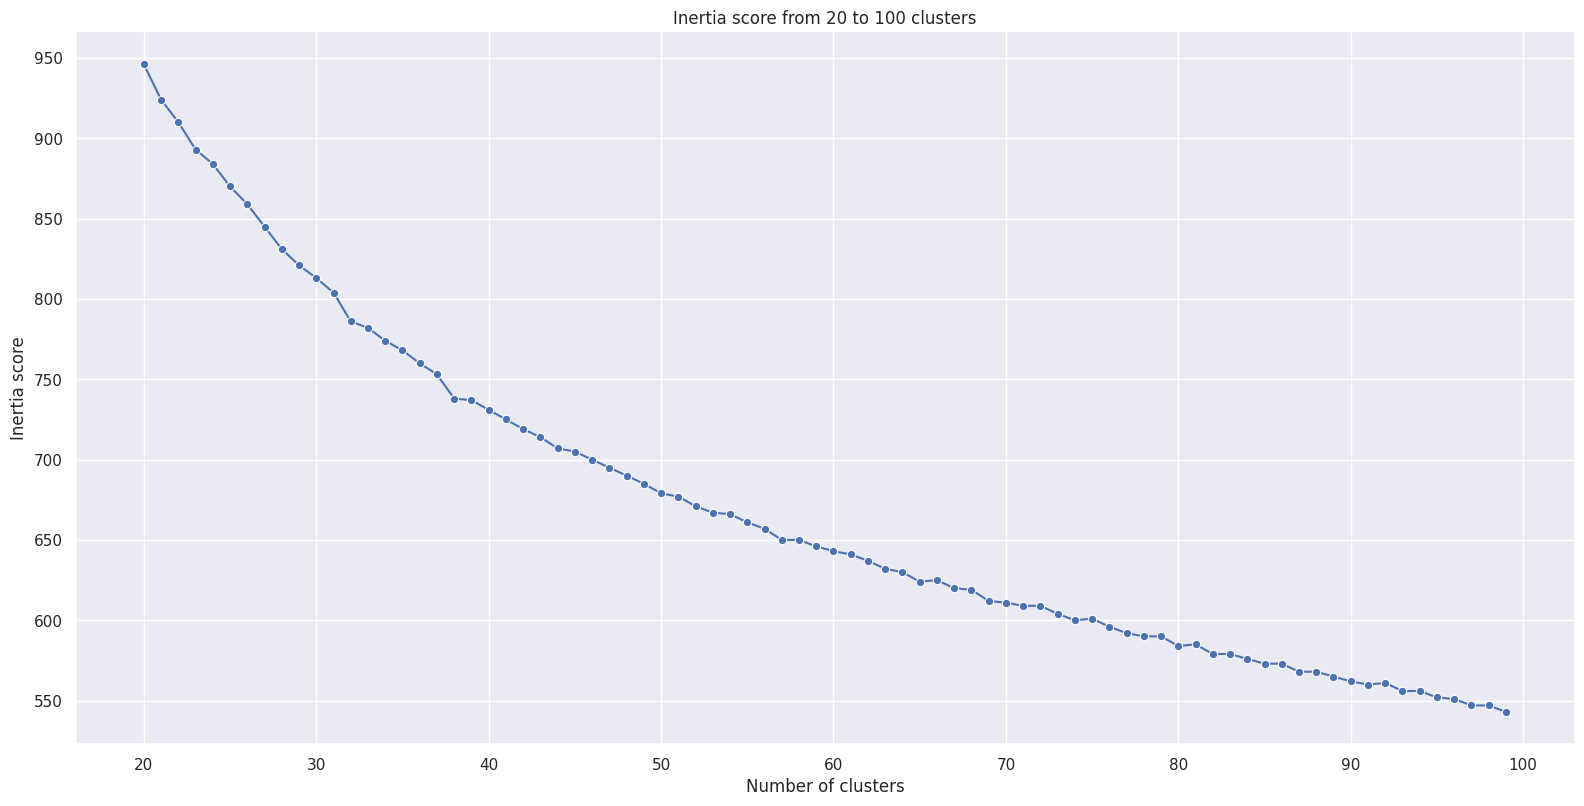

In [ ]:
# Set the Seaborn theme to darkgrid
sns.set_theme(style='darkgrid')

(
# Create a line plot of the inertia scores
sns.relplot(y = inertia_list,
            x = range(20, 100),
            kind = 'line',
            marker = 'o',
            height = 8,
            aspect = 2)
# Set the title of the plot
.set(title=f"Inertia score from 20 to 100 clusters")
# Set the axis labels
.set_axis_labels("Number of clusters", "Inertia score")
);

In [ ]:
df_scaled_features2 = df_scaled_features.copy()

In [ ]:
# Initialise the model
my_kmeans = KMeans(n_clusters = 60, # you always choose the number of k here
                   random_state = 132)

# Fit the model to the data
my_kmeans.fit(df_scaled_features)

# Obtain the cluster output
clusters = my_kmeans.labels_

# Attach the cluster output to our original DataFrame
df_scaled_features["cluster"] = clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
# Initialise the model
my_kmeans = KMeans(n_clusters = 50, # you always choose the number of k here
                   random_state = 132)

# Fit the model to the data
my_kmeans.fit(df_scaled_features2)

# Obtain the cluster output
clusters2 = my_kmeans.labels_

# Attach the cluster output to our original DataFrame
df_scaled_features2["cluster"] = clusters2

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
df_scaled_features.sort_values("cluster")

,,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,cluster
name,artist,,,,,,,,,,,,,
I Can't Stop,Flux Pavilion,0.530507,0.7750,0.000000,0.860715,0.0,0.033115,0.000675,0.251777,0.414387,0.208122,0.653918,0.8,0
Ancient Slumber,Necrophagia,0.351603,0.6390,0.090909,0.721920,0.0,0.093355,0.029317,0.470051,0.105370,0.040203,0.542362,0.8,0
Blame (feat. John Newman),Calvin Harris,0.426060,0.8590,0.000000,0.911349,0.0,0.092593,0.028313,0.007777,0.409321,0.372589,0.597836,0.8,0
Don't Look Back into the Sun,The Libertines,0.245088,0.8420,0.000000,0.912099,0.0,0.101307,0.005633,0.000895,0.297872,0.611168,0.419384,0.8,0
The Nun's Litany,The Magnetic Fields,0.240951,0.9320,0.090909,0.868149,0.0,0.290850,0.033133,0.001391,0.256332,0.619289,0.952035,0.8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Clique,Kanye West,0.734230,0.5550,0.818182,0.881256,0.0,0.321351,0.060341,0.000000,0.229990,0.307614,0.510323,1.0,59
God Only Knows - Mono / 1997 Remastered,The Beach Boys,0.538780,0.4870,0.545455,0.855450,0.0,0.032571,0.254016,0.000000,0.058663,0.490355,0.547091,0.8,59
Take This Ride,Vigiland,0.628749,0.5360,0.727273,0.890825,0.0,0.051089,0.007068,0.000036,0.466059,0.169543,0.523553,0.8,59


In [ ]:
df_scaled_features["cluster"].value_counts()

,count
cluster,
56,169
4,154
36,152
33,150
25,148
28,148
15,146
1,141
31,139


In [ ]:
df_scaled_features2.sort_values("cluster")

,,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,cluster
name,artist,,,,,,,,,,,,,
i'm so tired...,Lauv,0.619442,0.733,1.000000,0.863063,1.0,0.221133,0.176707,0.000000,0.245187,0.542132,0.477644,0.8,0
Te Siento,Wisin & Yandel,0.735264,0.860,0.727273,0.920951,1.0,0.045098,0.015361,0.000000,0.388045,0.410152,0.513790,0.8,0
Wildest Dreams,Taylor Swift,0.571872,0.664,0.727273,0.857210,1.0,0.080719,0.071185,0.005685,0.107396,0.474112,0.654517,0.8,0
Your Fucking Sunny Day,Lambchop,0.550155,0.912,0.818182,0.923250,1.0,0.039216,0.043173,0.010558,0.235056,0.725888,0.665896,0.8,0
King Of The Beach,Wavves,0.379524,0.973,1.000000,0.942405,1.0,0.107298,0.000430,0.000015,0.374873,0.626396,0.794631,0.8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Big Yellow Taxi,Joni Mitchell,0.631851,0.470,0.363636,0.829203,1.0,0.038780,0.581325,0.000000,0.588652,0.984772,0.399678,0.8,49
Ein Herz kann man nicht reparieren (feat. Inga Humpe) - MTV Unplugged,Udo Lindenberg,0.707342,0.920,0.181818,0.881810,1.0,0.041612,0.467871,0.021117,0.702128,0.846701,0.646689,0.8,49
Kenha Ki Ben Ki Ta Bai - Live,Mayra Andrade,0.585315,0.482,0.727273,0.784161,1.0,0.067865,0.453815,0.000207,0.699088,0.635533,0.618440,0.8,49


In [ ]:
df_scaled_features2["cluster"].value_counts()

,count
cluster,
11,226
20,210
28,196
8,183
12,178
30,163
18,157
46,150
0,150
